# Naive Bayes on BreastCancer dataset

## Import packages

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


## Load dataset 

In [2]:
df = pd.read_csv("BreastCancer.csv")                         # importing dataset with pandas   

In [3]:
df.info()                                              # more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Preprocess dataset

In [6]:
# split to train and test
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [7]:
# seperate targets
y_train = train["Class"]
x_train = train.loc[:, train.columns != 'Class']

y_test = test["Class"]
x_test = test.loc[:, test.columns != 'Class']

In [8]:
# scale datset
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Multinomial Naive Bayes model

In [9]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [24]:
#predict test and train
y_pred_test = mnb.predict(x_test)
y_pred_train = mnb.predict(x_train)

print('Model(test) accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model(test) accuracy score: 0.9220
Training-set accuracy score: 0.9519


In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(mnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(mnb.score(x_test, y_test)))


Training set score: 0.9519
Test set score: 0.9220


In [26]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_test)
TP = cm[0,0]   # true positive
TN = cm[1,1]   # true negative
FP = cm[0,1]   # false positive
FN = cm[1,0]   # false negative

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', TP)
print('True Negatives(TN) = ', TN)
print('False Positives(FP) = ', FP)
print('False Negatives(FN) = ', FN)

Confusion matrix

 [[124   3]
 [ 13  65]]
True Positives(TP) =  124
True Negatives(TN) =  65
False Positives(FP) =  3
False Negatives(FN) =  13


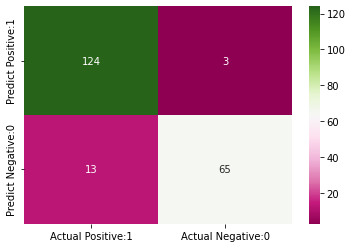

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="PiYG")

In [28]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9220
Classification error : 0.0780


In [29]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(mnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))


# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.9375     0.97916667 0.875      0.91666667 1.         0.9375
 0.97916667 0.89583333 0.95744681 0.95744681]
Average cross-validation score: 0.9436


## Gaussian Naive Bayes model

In [16]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [30]:
#predict test and train
y_pred_test = gnb.predict(x_test)
y_pred_train = gnb.predict(x_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9659
Training-set accuracy score: 0.9603


In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

#These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 0.9603
Test set score: 0.9659


In [33]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_test)
TP = cm[0,0]   # true positive
TN = cm[1,1]   # true negative
FP = cm[0,1]   # false positive
FN = cm[1,0]   # false negative

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', TP)
print('True Negatives(TN) = ', TN)
print('False Positives(FP) = ', FP)
print('False Negatives(FN) = ', FN)

Confusion matrix

 [[123   4]
 [  3  75]]
True Positives(TP) =  123
True Negatives(TN) =  75
False Positives(FP) =  4
False Negatives(FN) =  3


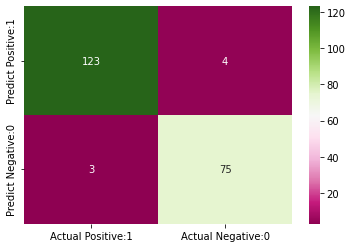

In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="PiYG")

In [21]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9659
Classification error : 0.0341


In [22]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))


# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[1.         0.97916667 0.89583333 0.95833333 0.9375     0.95833333
 0.97916667 0.9375     0.95744681 0.9787234 ]
Average cross-validation score: 0.9582
